In [4]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt

## Loading the data

In [2]:
# Load CIFAR10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 143s 1us/step


## Exploring the data and preparing it

(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


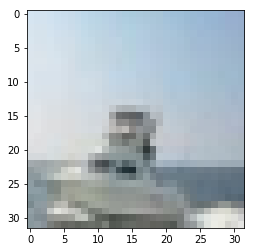

In [5]:
print(X_train.shape)
print(X_train[0])
plt.imshow(X_train[100])

In [4]:
print(y_train.shape)
print(y_train[:10])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [6]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)
print(Y_train[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Training and testing function

In [8]:
def compile_and_fit_model(model, optimizer, batch_size=32, epochs=10, verbose=1):    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    score = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: {0}".format(score[1]))

## Create a model

In [9]:
model_1 = Sequential()
model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

## Train it and hope for the best!

In [10]:
compile_and_fit_model(model=model_1, optimizer=Adam(), batch_size=256, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 667s 13ms/step - loss: 1.9782 - acc: 0.2149
Epoch 2/15
50000/50000 [==============================] - 774s 15ms/step - loss: 1.5798 - acc: 0.3918
Epoch 3/15
50000/50000 [==============================] - 759s 15ms/step - loss: 1.3086 - acc: 0.5261
Epoch 4/15
50000/50000 [==============================] - 783s 16ms/step - loss: 1.1404 - acc: 0.5983
Epoch 5/15
50000/50000 [==============================] - 644s 13ms/step - loss: 1.0394 - acc: 0.6376
Epoch 6/15
50000/50000 [==============================] - 637s 13ms/step - loss: 0.9605 - acc: 0.6667
Epoch 7/15
50000/50000 [==============================] - 644s 13ms/step - loss: 0.9101 - acc: 0.6874
Epoch 8/15
50000/50000 [==============================] - 655s 13ms/step - loss: 0.8532 - acc: 0.7083
Epoch 9/15
50000/50000 [==============================] - 647s 13ms/step - loss: 0.8212 - acc: 0.7189
Epoch 10/15
50000/50000 [==============================] - 643s 13ms/step - loss: 

## Conclusion

As seen in the above model, I could hardly hit the 77% accuracy. This is not the best result.
My design was actually about throwing in some hidden layers and trying for 1 epoch and looking if it was promising or not. If not, I stop it and try another design. Eventually I let this one complete and see the result.
Then I looked quikly online to see how people would solve this problem. I found this link https://github.com/BIGBALLON/cifar-10-cnn#accuracy-of-all-my-implementations which also hit a similar result and then had to ho for more complicated networks with more time and processing time to finish. 